# Deep Learning Con Tensorflow

Tomado del curso [Deep Learning con Tensorflow para Machine Learning e IA](https://www.udemy.com/course/tensorflow-python/) del profesor [Juan Gabriel Gomila Salas](https://github.com/joanby/tensorflow).

## Operaciones en el grafo de computación

In [1]:
import tensorflow as tf
session = tf.Session()

In [2]:
import numpy as np

In [4]:
x_vals = np.array([2.,4.,6.,8.,10.,12.])

In [6]:
x_data = tf.placeholder(tf.float32)

In [8]:
m_const = tf.constant(3.)

$$ y = mx = 3x $$

In [10]:
my_product = tf.multiply(m_const, x_data)
my_product

<tf.Tensor 'Mul_1:0' shape=<unknown> dtype=float32>

In [12]:
for x_val in x_vals:
    print(session.run(my_product, feed_dict = {x_data: x_val}))

6.0
12.0
18.0
24.0
30.0
36.0


In [13]:
print(session.run(my_product, feed_dict = {x_data: x_vals}))

[ 6. 12. 18. 24. 30. 36.]


In [14]:
session.run(tf.multiply(m_const, x_vals))

array([ 6., 12., 18., 24., 30., 36.], dtype=float32)

## Operaciones por capas

In [17]:
import tensorflow as tf
session = tf.Session()

In [18]:
import numpy as np

In [20]:
my_array = np.array([[1.,3.,5.,7.],
                    [-2.,0.,7.,6.],
                    [-6.,-1.,0.,3.]])
my_array

array([[ 1.,  3.,  5.,  7.],
       [-2.,  0.,  7.,  6.],
       [-6., -1.,  0.,  3.]])

In [21]:
x_vals = np.array([my_array, my_array+1])
x_vals

array([[[ 1.,  3.,  5.,  7.],
        [-2.,  0.,  7.,  6.],
        [-6., -1.,  0.,  3.]],

       [[ 2.,  4.,  6.,  8.],
        [-1.,  1.,  8.,  7.],
        [-5.,  0.,  1.,  4.]]])

In [29]:
x_data = tf.placeholder(tf.float32, shape=(3,None))

In [25]:
m1 = tf.constant([[1.],[0.],[-2.],[5.]])
m2 = tf.constant([[7.]])
a1 = tf.constant([[15.]])

$$(X\cdot m_1)m_2+a_1$$

In [31]:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [32]:
for x_val in x_vals:
    print(session.run(add1, feed_dict={x_data: x_val}))

[[197.]
 [113.]
 [ 78.]]
[[225.]
 [141.]
 [106.]]


## Trabajar con múltiples capas

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.InteractiveSession()
# session = tf.Session()

C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [47]:
x_shape = [1,4,4,1]
x_val = np.random.uniform(size = x_shape)
x_val

array([[[[0.06128026],
         [0.87156032],
         [0.72401941],
         [0.60112092]],

        [[0.8891606 ],
         [0.28728361],
         [0.83489501],
         [0.40807198]],

        [[0.7320763 ],
         [0.75241017],
         [0.79797285],
         [0.77101396]],

        [[0.76440585],
         [0.00251679],
         [0.54689621],
         [0.13860781]]]])

In [48]:
x_data = tf.placeholder(tf.float32, shape = x_shape)

In [49]:
my_filter = tf.constant(0.25, shape = [2,2,1,1])
my_strides = [1,2,2,1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter,my_strides, padding='SAME', name='Moving_Average_Wnd')

$$\frac{W-F+2P}{S}+1$$

- W : dimensión de entrada
- F: Dimensión del filtro
- P: Padding
- S: Stride

In [50]:
def custom_layer(input_matrix):
    input_matrix_squeezed  =tf.squeeze(input_matrix)
    A = tf.constant([[1.,2.],[3.,4.]])
    b = tf.constant(1., shape=[2,2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp2 = tf.add(temp1, b)
    return tf.sigmoid(temp2)

In [51]:
with tf.name_scope("Custom_layer") as scope:
    customlayer1 = custom_layer(mov_avg_layer) 

In [52]:
session.run(customlayer1, feed_dict={x_data: x_val})

array([[0.9341972 , 0.94099253],
       [0.9921033 , 0.9944067 ]], dtype=float32)

### Tensorboard

In [53]:
writer = tf.summary.FileWriter('multiple-layes', session.graph)
session.run(customlayer1, feed_dict={x_data: x_val})
writer.close()

## Funciones de pérdida en predicción

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
session = tf.Session()

In [29]:
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

### Norma L2 (distancia Euclidiana)

$$L2(y_r, y_p) = \sqrt{\sum(y_r-y_p)^2}$$

In [42]:
l2_y_vals = tf.square(target-x_vals)
l2_y_out = session.run(l2_y_vals)

In [31]:
l2_y_vals = tf.sqrt(tf.reduce_sum(tf.square(target-x_vals)))
l2_y_out = session.run(l2_y_vals)
print((l2_y_out**2)/2)

83.66733226343104


In [32]:
session.run(tf.nn.l2_loss(target-x_vals))

83.667336

### Norma L1

$$L1(y_r,y_p)=|y_r-y_p|$$

In [33]:
l1_y_vals = tf.abs(target-x_vals)

In [34]:
l1_y_out = session.run(l1_y_vals)

In [73]:
print(l1_y_out)

[1.         0.995992   0.99198395 0.98797596 0.98396796 0.9799599
 0.9759519  0.9719439  0.96793586 0.96392787 0.9599198  0.9559118
 0.9519038  0.94789577 0.94388777 0.9398798  0.9358717  0.9318637
 0.92785573 0.9238477  0.9198397  0.9158317  0.91182363 0.90781564
 0.90380764 0.8997996  0.8957916  0.8917836  0.88777554 0.88376755
 0.87975955 0.8757515  0.8717435  0.8677355  0.86372745 0.85971946
 0.8557114  0.8517034  0.8476954  0.84368736 0.83967936 0.8356713
 0.8316633  0.8276553  0.82364726 0.81963927 0.8156313  0.8116232
 0.8076152  0.8036072  0.7995992  0.7955912  0.7915832  0.7875751
 0.78356713 0.77955914 0.7755511  0.7715431  0.7675351  0.76352704
 0.75951904 0.75551105 0.751503   0.747495   0.743487   0.73947895
 0.73547095 0.73146296 0.7274549  0.72344685 0.7194389  0.71543086
 0.7114228  0.70741487 0.7034068  0.69939876 0.6953908  0.69138277
 0.6873747  0.6833667  0.6793587  0.67535067 0.6713427  0.6673347
 0.6633266  0.6593186  0.65531063 0.6513026  0.6472946  0.6432866
 0.

### Pseudo-Huber

$$PH(y_r,y_p) = \delta^2 \cdot \sqrt{1+\left(\frac{y_r-y_p}{\delta}\right)^2}-1, \delta > 0$$

In [49]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.+tf.square((target-x_vals)/delta1))-1.)

In [50]:
phuber1_y_out = session.run(phuber1_y_vals)
print(phuber1_y_out)

[1.95194095e-01 1.94222122e-01 1.93250388e-01 1.92278922e-01
 1.91307634e-01 1.90336585e-01 1.89365774e-01 1.88395262e-01
 1.87424958e-01 1.86454892e-01 1.85485139e-01 1.84515625e-01
 1.83546349e-01 1.82577342e-01 1.81608602e-01 1.80640161e-01
 1.79671928e-01 1.78704023e-01 1.77736357e-01 1.76769003e-01
 1.75801963e-01 1.74835175e-01 1.73868656e-01 1.72902465e-01
 1.71936601e-01 1.70970991e-01 1.70005724e-01 1.69040769e-01
 1.68076113e-01 1.67111784e-01 1.66147754e-01 1.65184096e-01
 1.64220735e-01 1.63257748e-01 1.62295029e-01 1.61332756e-01
 1.60370767e-01 1.59409150e-01 1.58447891e-01 1.57486990e-01
 1.56526446e-01 1.55566275e-01 1.54606521e-01 1.53647125e-01
 1.52688131e-01 1.51729509e-01 1.50771290e-01 1.49813473e-01
 1.48856103e-01 1.47899121e-01 1.46942526e-01 1.45986423e-01
 1.45030722e-01 1.44075468e-01 1.43120602e-01 1.42166257e-01
 1.41212344e-01 1.40258908e-01 1.39305934e-01 1.38353407e-01
 1.37401402e-01 1.36449888e-01 1.35498852e-01 1.34548336e-01
 1.33598328e-01 1.326488

## Funciones de pérdida para problemas de clasificación

In [4]:
import tensorflow as tf
import numpy as np
session = tf.Session()

In [53]:
x_vals = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)

### Hinge (función bisagra)

$$H(y_r,y_p)=max(0, 1-y_r\cdot y_p)$$

In [54]:
hinge_y_vals = tf.maximum(0., 1.0 - tf.multiply(target, x_vals))
hinge_y_out = session.run(hinge_y_vals)
print(hinge_y_out)

[4.         3.983968   3.9679358  3.9519038  3.9358718  3.9198396
 3.9038076  3.8877757  3.8717434  3.8557115  3.8396792  3.8236473
 3.8076153  3.791583   3.775551   3.759519   3.743487   3.727455
 3.711423   3.6953907  3.6793587  3.6633267  3.6472945  3.6312625
 3.6152306  3.5991983  3.5831664  3.5671344  3.5511022  3.5350702
 3.5190382  3.503006   3.486974   3.470942   3.4549098  3.4388778
 3.4228456  3.4068136  3.3907816  3.3747494  3.3587174  3.3426852
 3.3266532  3.3106213  3.294589   3.278557   3.262525   3.2464929
 3.230461   3.214429   3.1983967  3.1823647  3.1663327  3.1503005
 3.1342685  3.1182365  3.1022043  3.0861723  3.0701404  3.0541081
 3.0380762  3.0220442  3.006012   2.98998    2.973948   2.9579158
 2.9418838  2.9258518  2.9098196  2.8937874  2.8777556  2.8617234
 2.8456912  2.8296595  2.8136272  2.797595   2.7815633  2.765531
 2.7494988  2.7334669  2.717435   2.7014027  2.6853707  2.6693387
 2.6533065  2.6372745  2.6212425  2.6052103  2.5891783  2.5731463
 2.5571141  

### Entropía cruzada (función logística)

$$H(y_r,y_p) = -y_r\cdot log(y_p) - (1-y_r)\cdot log(1-y_p)$$

In [56]:
xentr_y_vals = -tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.-target), tf.log(1.-x_vals))
xentr_y_out = session.run(xentr_y_vals)
print(xentr_y_out)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

### Entropía cruzada de sigmoide (evitar nans)

$$H(y_r,y_p) = -y_r\cdot log\left(\frac{1}{1+e^{-y_p}}\right) - (1-y_r)\cdot log\left(1-\frac{1}{1+e^{-y_p}}\right)$$

In [58]:
xentr_sig_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels = targets)
xentr_sig_y_out = session.run(xentr_sig_y_vals)
print(xentr_sig_y_out)

[3.0485873  3.0333216  3.0180674  3.0028253  2.9875953  2.9723773
 2.9571722  2.9419796  2.9267998  2.9116333  2.8964796  2.8813396
 2.866213   2.8511002  2.8360016  2.8209174  2.805847   2.7907915
 2.7757509  2.7607253  2.7457147  2.7307198  2.7157404  2.700777
 2.6858296  2.6708984  2.6559842  2.6410863  2.6262057  2.6113422
 2.5964963  2.581668   2.5668578  2.5520658  2.5372922  2.5225375
 2.5078013  2.493085   2.4783878  2.4637103  2.4490528  2.4344156
 2.419799   2.4052036  2.3906288  2.3760755  2.3615441  2.3470345
 2.332547   2.3180823  2.3036401  2.2892213  2.2748258  2.2604537
 2.246106   2.2317827  2.2174835  2.2032096  2.188961   2.174738
 2.1605408  2.14637    2.1322253  2.1181078  2.1040173  2.0899544
 2.0759194  2.0619125  2.0479343  2.0339847  2.0200646  2.006174
 1.9923133  1.978483   1.964683   1.9509143  1.9371768  1.923471
 1.9097973  1.8961561  1.8825476  1.8689723  1.8554305  1.8419226
 1.828449   1.8150101  1.8016063  1.7882378  1.7749051  1.7616086
 1.7483487  1.

In [61]:
pos_weight = tf.constant(0.5)
xentr_sig_w_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets = targets, pos_weight = pos_weight)
xentr_sig_w_y_out = session.run(xentr_sig_w_y_vals)
print(xentr_sig_w_y_out)

[1.5242937  1.5166608  1.5090337  1.5014126  1.4937977  1.4861887
 1.4785861  1.4709898  1.4633999  1.4558166  1.4482398  1.4406698
 1.4331065  1.4255501  1.4180008  1.4104587  1.4029235  1.3953958
 1.3878754  1.3803626  1.3728573  1.3653599  1.3578702  1.3503885
 1.3429148  1.3354492  1.3279921  1.3205432  1.3131028  1.3056711
 1.2982482  1.290834   1.2834289  1.2760329  1.2686461  1.2612687
 1.2539006  1.2465425  1.2391939  1.2318552  1.2245264  1.2172078
 1.2098995  1.2026018  1.1953144  1.1880378  1.1807721  1.1735172
 1.1662735  1.1590412  1.1518201  1.1446106  1.1374129  1.1302269
 1.123053   1.1158913  1.1087418  1.1016048  1.0944805  1.087369
 1.0802704  1.073185   1.0661126  1.0590539  1.0520086  1.0449772
 1.0379597  1.0309563  1.0239671  1.0169923  1.0100323  1.003087
 0.99615663 0.9892415  0.9823415  0.97545713 0.9685884  0.9617355
 0.95489866 0.94807804 0.9412738  0.93448615 0.92771524 0.9209613
 0.9142245  0.90750504 0.90080315 0.8941189  0.88745254 0.8808043
 0.87417436 

### Softmax Cross Entropy (probabilidad)

$$SM(z_k) = \frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}$$

In [21]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[0.1,0.02,0.88]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

[1.1601256]


### Sparse softmax cross entropy (vector 0s y un 1)

In [ ]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[2]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

### Evaluar las funciones de pérdida

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Para predicción

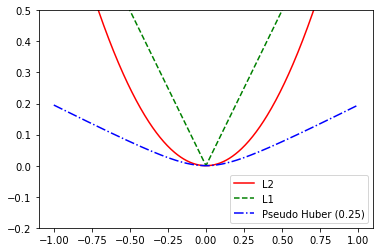

In [51]:
x_vals = tf.linspace(-1.,1.,500)
x_array = session.run(x_vals)
# print(x_vals.shape)
# print(l2_y_out.shape)
plt.plot(x_array, l2_y_out, 'r-', label='L2')
plt.plot(x_array, l1_y_out, 'g--', label='L1')
plt.plot(x_array, phuber1_y_out, 'b-.', label='Pseudo Huber (0.25)')
plt.ylim(-0.2, 0.5)
plt.legend(loc = 'lower right', prop={'size': 10})
plt.show()

#### Para clasificación

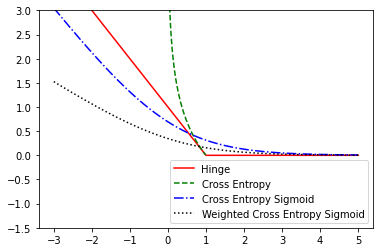

In [63]:
x_vals = tf.linspace(-3.,5.,500)
x_array = session.run(x_vals)

plt.plot(x_array, hinge_y_out, 'r-', label='Hinge')
plt.plot(x_array, xentr_y_out, 'g--', label='Cross Entropy')
plt.plot(x_array, xentr_sig_y_out, 'b-.', label='Cross Entropy Sigmoid')
plt.plot(x_array, xentr_sig_w_y_out, 'k:', label='Weighted Cross Entropy Sigmoid')
plt.ylim(-1.5, 3)
plt.legend(loc = 'lower right', prop={'size': 10})
plt.show()

# Propagación hacia atras

In [1]:
import numpy as np
import tensorflow as tf
session = tf.Session()

In [2]:
x_vals = np.random.normal(loc=1,scale=0.1, size = 200)
y_vals = np.repeat(10.,200)

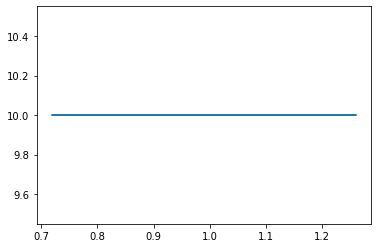

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_vals, y_vals)

In [3]:
x_data = tf.placeholder(shape = [1], dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

In [14]:
my_pred = tf.multiply(A, x_data)

In [15]:
loss = tf.square(my_pred - y_target)

In [16]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = 0.025)
train_step = my_optim.minimize(loss)

In [17]:
init = tf.global_variables_initializer()
session.run(init)

In [19]:
for i in range(400):
    rand_index = np.random.choice(200)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%20==0:
       print("Paso #" +  str(i+1)+" A = "+str(session.run(A))+" Loss: "+str(session.run(loss, feed_dict={x_data:rand_x, y_target: rand_y}))) 

Paso #20 A = [9.518439] Loss: [0.00731951]
Paso #40 A = [9.812304] Loss: [0.8632056]
Paso #60 A = [9.881844] Loss: [0.00156336]
Paso #80 A = [10.047333] Loss: [0.28311694]
Paso #100 A = [9.938346] Loss: [0.42835653]
Paso #120 A = [9.580785] Loss: [2.8371282]
Paso #140 A = [9.713846] Loss: [0.00132155]
Paso #160 A = [10.049053] Loss: [0.62877524]
Paso #180 A = [9.962666] Loss: [1.3096243]
Paso #200 A = [10.013754] Loss: [0.70275766]
Paso #220 A = [9.848461] Loss: [0.18943284]
Paso #240 A = [10.15191] Loss: [0.2404111]
Paso #260 A = [9.848379] Loss: [0.02007072]
Paso #280 A = [9.889252] Loss: [1.4632394]
Paso #300 A = [9.957682] Loss: [0.5233712]
Paso #320 A = [9.876638] Loss: [1.826698]
Paso #340 A = [9.958791] Loss: [1.266681]
Paso #360 A = [9.855842] Loss: [0.04603089]
Paso #380 A = [9.915981] Loss: [0.9824046]
Paso #400 A = [10.189205] Loss: [0.6807018]


### Clasificación binarias

- $X_1\sim N(-2,1), X_2\sim N(3,1)$
- $target(x_1) = 0, target(X_2) = 1$
- $sigmoid(x+A) = \frac{1}{1+e^{-(x+A)}}$
- Determinar el valor de $A$
- Teoricamente $A\simeq \frac{m_1+m_2}{2}, m_1 = -2, m_2 = 3\simeq 0.5$

In [62]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [63]:
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(3,1,100)))
y_vals = np.concatenate((np.repeat(0., 100), np.repeat(1.,100)))

In [64]:
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [65]:
my_pred = tf.add(x_data, A)

In [66]:
my_pred_expanded = tf.expand_dims(my_pred,0)
y_target_expanded = tf.expand_dims(y_target,0)

In [67]:
init = tf.initialize_all_variables()
session.run(init)
print(session.run(A))

[9.887072]


In [68]:
xentr = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred_expanded, labels = y_target_expanded)

In [69]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.04)
train_step = my_op.minimize(xentr)

In [70]:
x_plot = []
y_plot = []
for i in range(2000):
    rand_idx = np.random.choice(200)
    rand_x = [x_vals[rand_idx]]
    rand_y = [y_vals[rand_idx]]
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%100==0:
        x_plot.append(i+1)
        y_plot.append(session.run(xentr, feed_dict={x_data: rand_x, y_target: rand_y}))
        print("Paso #"+str(i+1)+", A = " + str(session.run(A)) + ", Loss = " + str(y_plot[-1]))

Paso #100, A = [7.9306107], Loss = [[8.885458e-06]]
Paso #200, A = [5.9566627], Loss = [[3.3164244]]
Paso #300, A = [4.3155775], Loss = [[1.563116]]
Paso #400, A = [2.9147372], Loss = [[0.0005072]]
Paso #500, A = [1.7776399], Loss = [[0.00131892]]
Paso #600, A = [1.1309456], Loss = [[0.13227056]]
Paso #700, A = [0.71775484], Loss = [[0.30890614]]
Paso #800, A = [0.44599473], Loss = [[0.0332334]]
Paso #900, A = [0.22913264], Loss = [[0.09268724]]
Paso #1000, A = [0.03743446], Loss = [[0.24266243]]
Paso #1100, A = [-0.24433707], Loss = [[0.06637489]]
Paso #1200, A = [-0.31688637], Loss = [[0.06282906]]
Paso #1300, A = [-0.3769615], Loss = [[0.25790927]]
Paso #1400, A = [-0.33883557], Loss = [[0.19389296]]
Paso #1500, A = [-0.4491358], Loss = [[0.04811106]]
Paso #1600, A = [-0.440592], Loss = [[0.18639013]]
Paso #1700, A = [-0.48017326], Loss = [[0.05435304]]
Paso #1800, A = [-0.47604728], Loss = [[0.03083717]]
Paso #1900, A = [-0.45296872], Loss = [[0.04647366]]
Paso #2000, A = [-0.49839

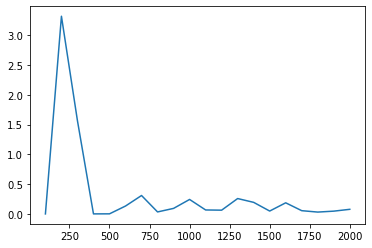

In [71]:
import matplotlib.pyplot as plt
y_plot_ = [i[0][0] for i in y_plot]
plt.plot(x_plot, y_plot_)

### Entrenamiento estocástico y por bloques

In [94]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
batch_size = 25

In [97]:
x_vals = np.random.normal(1.,.1,200)
y_vals = np.repeat(10.,200)

In [98]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1,1]))

In [99]:
my_pred = tf.matmul(x_data, A)

In [100]:
loss = tf.reduce_mean(tf.square(my_pred-y_target))

In [101]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_op.minimize(loss)

In [103]:
init = tf.global_variables_initializer()

In [104]:
session.run(init)

In [105]:
loss_batch = []
for i in range(200):
    rand_index  = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if((i+1)%5==0):
        print("Paso #"+str(i+1)+" A= " + str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print("Loss: " + str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A= [[1.5063461]]
Loss: 71.84914
Paso #10 A= [[3.430008]]
Loss: 42.849907
Paso #15 A= [[4.905997]]
Loss: 25.91264
Paso #20 A= [[6.044809]]
Loss: 15.096284
Paso #25 A= [[6.9242277]]
Loss: 10.098492
Paso #30 A= [[7.609862]]
Loss: 6.464039
Paso #35 A= [[8.13101]]
Loss: 4.7469115
Paso #40 A= [[8.527574]]
Loss: 2.3340194
Paso #45 A= [[8.849944]]
Loss: 2.2096627
Paso #50 A= [[9.091916]]
Loss: 1.4849313
Paso #55 A= [[9.273289]]
Loss: 1.3777957
Paso #60 A= [[9.403254]]
Loss: 1.1762334
Paso #65 A= [[9.523606]]
Loss: 1.4813544
Paso #70 A= [[9.604657]]
Loss: 1.4464177
Paso #75 A= [[9.669778]]
Loss: 0.8391789
Paso #80 A= [[9.714605]]
Loss: 1.0098946
Paso #85 A= [[9.770978]]
Loss: 1.2041374
Paso #90 A= [[9.810205]]
Loss: 0.9332936
Paso #95 A= [[9.819281]]
Loss: 1.2233287
Paso #100 A= [[9.842834]]
Loss: 0.9759754
Paso #105 A= [[9.8659]]
Loss: 1.2219889
Paso #110 A= [[9.863509]]
Loss: 0.98378456
Paso #115 A= [[9.865958]]
Loss: 1.0951376
Paso #120 A= [[9.884556]]
Loss: 0.97610307
Paso #125 A= [

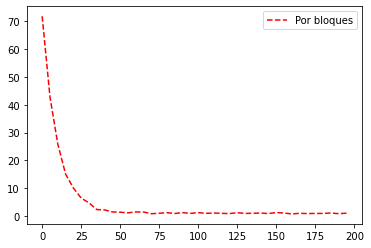

In [107]:
plt.plot(range(0,200,5),loss_batch, 'r--', label = 'Por bloques')
plt.legend(loc= 'upper right', prop = {'size': 10})
plt.show()

### Clasificación de la _Iris Setosa_

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

#### Carga de datos

In [37]:
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

#### Declarar variables

In [38]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

#### Crear el modelo
$$ x_2 = Ax_1+b \Rightarrow x_2-Ax_1-b = 0 $$

In [47]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [48]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_pred = tf.subtract(x1_data, my_add)

#### Función de pérdidas y propagación hacia atrás

In [49]:
xentr = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred, labels = y_target)
my_op = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_op.minimize(xentr)

#### Inicializar variables

In [50]:
init = tf.global_variables_initializer()
session.run(init)

#### Entrenar

In [51]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris_2d), size = batch_size)
    rand_x = iris_2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]]) 
    session.run(train_step, feed_dict = {x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if(i+1)%100==0:
        print("Paso # " + str(i+1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)))
    

Paso # 100, A = [[7.276183]], b = [[-2.4950957]]
Paso # 200, A = [[8.66152]], b = [[-3.519854]]
Paso # 300, A = [[9.501581]], b = [[-4.2252026]]
Paso # 400, A = [[10.16071]], b = [[-4.664791]]
Paso # 500, A = [[10.678926]], b = [[-5.026338]]
Paso # 600, A = [[11.016813]], b = [[-5.504225]]
Paso # 700, A = [[11.490419]], b = [[-5.6469975]]
Paso # 800, A = [[11.845481]], b = [[-5.911754]]
Paso # 900, A = [[12.115455]], b = [[-6.16979]]
Paso # 1000, A = [[12.365904]], b = [[-6.4241776]]


#### Modelo final

In [55]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(slope, intercept)

12.365904 -6.4241776


#### Representación de la separación

In [56]:
x = np.linspace(0,3,num = 100)
abline_values = []
for i in x:
    abline_values.append(slope*i+intercept)

setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]

no_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
no_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

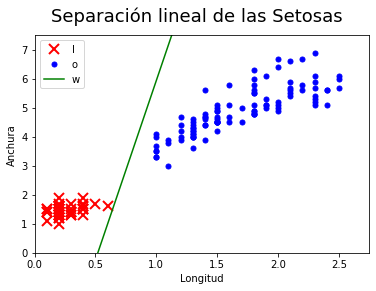

In [60]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew = 2, label = 'Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'bo', ms=5, mew = 1, label = 'No Setosa')
plt.plot(x, abline_values, 'g-')
plt.suptitle('Separación lineal de las Setosas', fontsize = 18)
plt.xlabel('Longitud')
plt.ylabel('Anchura')
plt.legend('lowe right')
plt.xlim([0,2.75])
plt.ylim([0,7.5])
plt.show()